In [14]:
import os, shutil
original_dataset_dir = 'D://flowers'
original_dataset_dir = os.path.join(original_dataset_dir,'flowers')

https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [15]:
print(original_dataset_dir)

D://flowers\flowers


In [16]:

flower_names = os.listdir(original_dataset_dir)

In [20]:
flower_train = os.path.join(original_dataset_dir,'train')
#os.mkdir(flower_train)


In [21]:
flower_test = os.path.join(original_dataset_dir,'test')
#os.mkdir(flower_test)

In [46]:
def create_flower_dir():
    for flower_name in flower_names:
        flower_path = os.path.join(original_dataset_dir,flower_name)
        flowerslist = os.listdir(flower_path)
        flower_train = os.path.join(original_dataset_dir,'train')
        flower_train = os.path.join(flower_train,flower_name)
        flower_test = os.path.join(original_dataset_dir,'test')
        flower_test = os.path.join(flower_test,flower_name)
        os.mkdir(flower_train)
        os.mkdir(flower_test)
        print(len(flowerslist))
    



In [81]:
def total_flower_in_set():
    train_count = 0
    test_count =0
    dsttest = os.path.join(original_dataset_dir,'test')
    dsttrain = os.path.join(original_dataset_dir,'train')
    flower_names = os.listdir(dsttest)
    for flower_name in flower_names:
        test_dst = os.path.join(dsttest,flower_name)
        test_count = test_count + len(os.listdir(test_dst))
        train_dst = os.path.join(dsttrain,flower_name)
        train_count = train_count + len(os.listdir(train_dst))
        print(flower_name)
        print(test_dst)
        print(len(os.listdir(test_dst)))
    return train_count,test_count

In [82]:
train_c,test_c=total_flower_in_set()

daisy
D://flowers\flowers\test\daisy
101
dandelion
D://flowers\flowers\test\dandelion
101
rose
D://flowers\flowers\test\rose
101
sunflower
D://flowers\flowers\test\sunflower
101
tulip
D://flowers\flowers\test\tulip
101


In [83]:
train_c,test_c

(3821, 505)

In [22]:
# lets talk 100 each in test set and rest in training set
#create_flower_dir()

In [23]:
def copy_flower_per_cat():
    for flower_name in flower_names:
        flower_path = os.path.join(original_dataset_dir,flower_name)
        flowerslist = os.listdir(flower_path)
        for i,flower in enumerate(flowerslist):
            print(flower)
            if(i<=100):
                #copy in test
                src = os.path.join(original_dataset_dir,flower_name)
                src = os.path.join(src,flower)
                test_dst = os.path.join(original_dataset_dir,'test')
                test_dst = os.path.join(test_dst,flower_name)
                test_dst = os.path.join(test_dst,flower)
                #print(test_dst)
                shutil.copyfile(src, test_dst)
            else:
                #copy in train
                src = os.path.join(original_dataset_dir,flower_name)
                src = os.path.join(src,flower)
                train_dst = os.path.join(original_dataset_dir,'train')
                train_dst = os.path.join(train_dst,flower_name)
                train_dst = os.path.join(train_dst,flower)
                shutil.copyfile(src, train_dst)
                
                
             
            
        
   

In [24]:
#copy_flower_per_cat()

In [25]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [26]:
train_generator = train_datagen.flow_from_directory(
        flower_train,
        target_size=(150, 150),
        batch_size=500,
        class_mode='categorical')

Found 3818 images belonging to 5 classes.


In [32]:
import numpy as np
sample_change = np.zeros(shape=(2,2))
sample_change


array([[0., 0.],
       [0., 0.]])

In [28]:
sample_change[1]=[2,4]
sample_change[0]=[1,5]

In [29]:
sample_change

array([[1., 5.],
       [2., 4.]])

In [30]:
i=0
for data,label in train_generator:
    if i<2:
         print(data.shape)
         print(label.shape)
    else:
        break
    i = i+1
        

(500, 150, 150, 3)
(500, 5)
(500, 150, 150, 3)
(500, 5)


In [84]:
train_c,test_c

(3821, 505)

In [93]:
import numpy as np
train_data_feature = np.zeros(shape=(3821, 150, 150, 3))
train_data_label = np.zeros(shape=(3821,5))
test_data_feature = np.zeros(shape=(505, 150, 150, 3))
test_data_label = np.zeros(shape=(505, 5))

In [99]:
i=0
batch_size=500
for input_batch,label_batch in train_generator:
    if ((i*batch_size) < 3821):
        train_data_feature[i*batch_size:(i+1)*batch_size] = input_batch
        train_data_label[i*batch_size:(i+1)*batch_size] = label_batch
    if(len(input_batch)<batch_size):
        size=len(input_batch)
        train_data_feature[i*batch_size:size] = input_batch
        train_data_label[i*batch_size:size] = label_batch
    else:
        break
    i=i+1
    

In [100]:
train_data_feature[4],train_data_label[4]

(array([[[0.40827894, 0.32857603, 0.00160943],
         [0.29716432, 0.21372734, 0.01414239],
         [0.41895887, 0.31208545, 0.00793715],
         ...,
         [0.59679985, 0.63192016, 0.02739165],
         [0.5920794 , 0.62664396, 0.00895715],
         [0.59074223, 0.62270266, 0.01100016]],
 
        [[0.2555562 , 0.20310466, 0.01341108],
         [0.13182573, 0.10339394, 0.0312696 ],
         [0.27083352, 0.21186383, 0.0052064 ],
         ...,
         [0.63630277, 0.67188847, 0.03541632],
         [0.61951745, 0.65149957, 0.04119094],
         [0.60355365, 0.63651693, 0.02290446]],
 
        [[0.11538032, 0.09405175, 0.02143819],
         [0.06052946, 0.06135727, 0.0474686 ],
         [0.1863907 , 0.15679474, 0.00179192],
         ...,
         [0.65511942, 0.68342489, 0.04205416],
         [0.64715606, 0.68007082, 0.06799167],
         [0.62780273, 0.65781975, 0.03910025]],
 
        ...,
 
        [[0.89406461, 0.88713264, 0.89308643],
         [0.57785422, 0.46477965, 0.28166

In [104]:
validation_generator = test_datagen.flow_from_directory(
        flower_test,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical')

Found 505 images belonging to 5 classes.


In [105]:
i=0
batch_size=50
for input_batch,label_batch in validation_generator:
    if ((i*batch_size) < 3821):
        test_data_feature[i*batch_size:(i+1)*batch_size] = input_batch
        test_data_label[i*batch_size:(i+1)*batch_size] = label_batch
    if(len(input_batch)<batch_size):
        size=len(input_batch)
        test_data_feature[i*batch_size:size] = input_batch
        test_data_label[i*batch_size:size] = label_batch
    else:
        break
    i=i+1

In [106]:
test_data_feature[4],test_data_label[4]

(array([[[0.7843138 , 0.78039223, 0.84313732],
         [0.7843138 , 0.78039223, 0.84313732],
         [0.78823537, 0.7843138 , 0.84705889],
         ...,
         [0.72549021, 0.72941178, 0.80784321],
         [0.72156864, 0.72549021, 0.80392164],
         [0.72156864, 0.72549021, 0.80392164]],
 
        [[0.78039223, 0.77647066, 0.83921576],
         [0.78039223, 0.77647066, 0.83921576],
         [0.7843138 , 0.78039223, 0.84313732],
         ...,
         [0.72549021, 0.72941178, 0.80784321],
         [0.72156864, 0.72549021, 0.80392164],
         [0.72156864, 0.72549021, 0.80392164]],
 
        [[0.77254909, 0.78039223, 0.83921576],
         [0.77254909, 0.78039223, 0.83921576],
         [0.77647066, 0.7843138 , 0.84313732],
         ...,
         [0.72549021, 0.72941178, 0.80784321],
         [0.72549021, 0.72941178, 0.80784321],
         [0.72156864, 0.72549021, 0.80392164]],
 
        ...,
 
        [[0.41176474, 0.48627454, 0.40784317],
         [0.07058824, 0.12156864, 0.05490

In [111]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,Input
from keras.models import Model

vision= Input(shape=(150,150,3))
conv2d_1=Conv2D(32,(3,3),activation='relu')(vision)
maxpool1=MaxPool2D(2,2)(conv2d_1)
conv2d_2=Conv2D(32,(3,3),activation='relu')(maxpool1)
maxpool2=MaxPool2D(2,2)(conv2d_2)
conv2d_3=Conv2D(32,(3,3),activation='relu')(maxpool2)
maxpool3=MaxPool2D(2,2)(conv2d_3)
flat=Flatten()(maxpool3)
dense=Dense(512,activation='relu')(flat)
output= Dense(5,activation='softmax')(dense)
model_func = Model(input=vision,output=output)
model_func.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])



c:\python3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [112]:
model_func.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 32)        0         
__________

In [113]:

model_func.fit(train_data_feature,train_data_label,batch_size=50,epochs=12,validation_data=(test_data_feature,test_data_label))

W0814 10:43:55.386344  5480 deprecation.py:323] From c:\python3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 10:43:55.547546  5480 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3821 samples, validate on 505 samples
Epoch 1/12
3821/3821 [==============================] - 64s 17ms/step - loss: 0.2130 - acc: 0.1955 - val_loss: 0.1339 - val_acc: 0.0455
Epoch 2/12
3821/3821 [==============================] - 65s 17ms/step - loss: 0.1795 - acc: 0.2319 - val_loss: 0.1404 - val_acc: 0.9584
Epoch 3/12
3821/3821 [==============================] - 72s 19ms/step - loss: 0.1398 - acc: 0.3156 - val_loss: 0.1153 - val_acc: 0.0515
Epoch 4/12
3821/3821 [==============================] - 68s 18ms/step - loss: 0.1119 - acc: 0.1175 - val_loss: 0.1115 - val_acc: 0.0535
Epoch 5/12
3821/3821 [==============================] - 75s 20ms/step - loss: 0.0690 - acc: 0.1065 - val_loss: 0.2037 - val_acc: 0.0535
Epoch 6/12
3821/3821 [==============================] - 68s 18ms/step - loss: 0.0376 - acc: 0.1183 - val_loss: 0.2326 - val_acc: 0.0495
Epoch 7/12
3821/3821 [==============================] - 73s 19ms/step - loss: 0.0279 - acc: 0.1222 - val_loss: 0.2989 - val_acc: 0.0554
E

In [114]:
score = model_func.evaluate(test_data_feature,test_data_label)

505/505 [==============================] - 2s 5ms/step


In [115]:
print('loss:' , score[0], 'accuracy : ',score[1])

loss: 0.5730922283512531 accuracy :  0.04356435643564356


4% accuracy is horrible lets try new more complicated model

In [116]:
visible= Input(shape=(150,150,3))
conv2d_1 = Conv2D(32,(3,3),activation='relu',padding='same')(visible)
conv2d_2 = Conv2D(32,(3,3),activation='relu',padding='same')(conv2d_1)
pool1= MaxPool2D(pool_size=(2,2))(conv2d_2)
dropout1=Dropout(0.5)(pool1)

conv2d_3 = Conv2D(32,(3,3),activation='relu',padding='same')(dropout1)
conv2d_4 = Conv2D(32,(3,3),activation='relu',padding='same')(conv2d_3)
pool2= MaxPool2D(pool_size=(2,2))(conv2d_4)
dropout2=Dropout(0.5)(pool2)

flat=Flatten()(dropout2)
dense= Dense(512,activation='relu')(flat)
dropout3=Dropout(0.5)(dense)
output = Dense(5,activation='softmax')(dropout3)
model = Model(input=visible,output=output)
print(model.summary())

W0814 11:03:24.091115  5480 deprecation.py:506] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        9248      
__________

c:\python3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [117]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
model.fit(train_data_feature,train_data_label,batch_size=50,epochs=12,validation_data=(test_data_feature,test_data_label))

Train on 3821 samples, validate on 505 samples
Epoch 1/12
3821/3821 [==============================] - 206s 54ms/step - loss: 1.7433 - acc: 0.0348 - val_loss: 1.2733 - val_acc: 0.0198
Epoch 2/12
3821/3821 [==============================] - 222s 58ms/step - loss: 1.7464 - acc: 0.0225 - val_loss: 1.2741 - val_acc: 0.0198
Epoch 3/12
3821/3821 [==============================] - 214s 56ms/step - loss: 1.7464 - acc: 0.0225 - val_loss: 1.2741 - val_acc: 0.0198
Epoch 4/12
3821/3821 [==============================] - 211s 55ms/step - loss: 1.7464 - acc: 0.0225 - val_loss: 1.2741 - val_acc: 0.0198
Epoch 5/12
3821/3821 [==============================] - 213s 56ms/step - loss: 1.2999 - acc: 0.1717 - val_loss: 0.1583 - val_acc: 0.9307
Epoch 6/12
3821/3821 [==============================] - 215s 56ms/step - loss: 0.2058 - acc: 0.2978 - val_loss: 0.1418 - val_acc: 0.0297
Epoch 7/12
3821/3821 [==============================] - 205s 54ms/step - loss: 0.1907 - acc: 0.1662 - val_loss: 0.1379 - val_acc: 0

In [118]:
score = model_func.evaluate(test_data_feature,test_data_label)
print('loss:' , score[0], 'accuracy : ',score[1])

505/505 [==============================] - 2s 5ms/step
loss: 0.5730922283512531 accuracy :  0.04356435643564356


In [117]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,Input
from keras.models import Model

In [119]:
from keras.models import Sequential

In [120]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()
        


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)             0         
__________

In [121]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [123]:
history=model.fit_generator(train_generator,steps_per_epoch=10,epochs=20,validation_data=validation_generator,validation_steps=50)

Epoch 1/20
10/10 [==============================] - 151s 15s/step - loss: 1.0887 - acc: 0.5653 - val_loss: 1.0838 - val_acc: 0.5853
Epoch 2/20
10/10 [==============================] - 136s 14s/step - loss: 1.0784 - acc: 0.5791 - val_loss: 1.1039 - val_acc: 0.5789
Epoch 3/20
10/10 [==============================] - 140s 14s/step - loss: 1.0336 - acc: 0.6006 - val_loss: 1.0476 - val_acc: 0.6129
Epoch 4/20
10/10 [==============================] - 132s 13s/step - loss: 0.9766 - acc: 0.6100 - val_loss: 1.2758 - val_acc: 0.5389
Epoch 5/20
10/10 [==============================] - 141s 14s/step - loss: 0.9399 - acc: 0.6301 - val_loss: 1.1195 - val_acc: 0.5763
Epoch 6/20
10/10 [==============================] - 157s 16s/step - loss: 0.9569 - acc: 0.6291 - val_loss: 1.0850 - val_acc: 0.6101
Epoch 7/20
10/10 [==============================] - 143s 14s/step - loss: 0.9821 - acc: 0.6260 - val_loss: 1.1865 - val_acc: 0.5332
Epoch 8/20
10/10 [==============================] - 132s 13s/step - loss: 0.

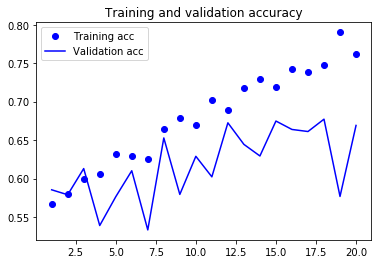

In [126]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [127]:
score = model.evaluate(test_data_feature,test_data_label)
print('loss:' , score[0], 'accuracy : ',score[1])

505/505 [==============================] - 3s 6ms/step
loss: 0.0816497783849735 accuracy :  0.06930693069306931


#### try with VGG16

In [128]:
from keras.applications import VGG16

In [129]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [130]:
i=0
batch_size=500
for input_batch,label_batch in train_generator:
    if ((i*batch_size) < 3821):
        feature_batch = conv_base.predict(input_batch)
        train_data_feature[i*batch_size:(i+1)*batch_size] = feature_batch
        train_data_label[i*batch_size:(i+1)*batch_size] = label_batch
    if(len(input_batch)<batch_size):
        size=len(input_batch)
        feature_batch = conv_base.predict(input_batch)
        train_data_feature[i*batch_size:size] = feature_batch
        train_data_label[i*batch_size:size] = label_batch
    else:
        break
    i=i+1
    

ValueError: could not broadcast input array from shape (500,4,4,512) into shape (500,150,150,3)

In [ ]:
i=0
batch_size=50
for input_batch,label_batch in validation_generator:
    if ((i*batch_size) < 3821):
        feature_batch = conv_base.predict(input_batch)
        test_data_feature[i*batch_size:(i+1)*batch_size] = feature_batch
        test_data_label[i*batch_size:(i+1)*batch_size] = label_batch
    if(len(input_batch)<batch_size):
        feature_batch = conv_base.predict(input_batch)
        size=len(input_batch)
        test_data_feature[i*batch_size:size] = feature_batch
        test_data_label[i*batch_size:size] = label_batch
    else:
        break
    i=i+1

In [131]:
visible= Input(shape=(150,150,3))
conv2d_1 = Conv2D(32,(3,3),activation='relu',padding='same')(visible)
conv2d_2 = Conv2D(32,(3,3),activation='relu',padding='same')(conv2d_1)
pool1= MaxPool2D(pool_size=(2,2))(conv2d_2)
dropout1=Dropout(0.5)(pool1)

conv2d_3 = Conv2D(32,(3,3),activation='relu',padding='same')(dropout1)
conv2d_4 = Conv2D(32,(3,3),activation='relu',padding='same')(conv2d_3)
pool2= MaxPool2D(pool_size=(2,2))(conv2d_4)
dropout2=Dropout(0.5)(pool2)

flat=Flatten()(dropout2)
dense= Dense(512,activation='relu')(flat)
dropout3=Dropout(0.5)(dense)
output = Dense(5,activation='softmax')(dropout3)
model = Model(input=visible,output=output)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 75, 75, 32)        9248      
__________

c:\python3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [132]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
model.fit(train_data_feature,train_data_label,batch_size=50,epochs=12,validation_data=(test_data_feature,test_data_label))

Train on 3821 samples, validate on 505 samples
Epoch 1/12
3821/3821 [==============================] - 228s 60ms/step - loss: 0.2374 - acc: 0.2620 - val_loss: 0.1535 - val_acc: 0.0317
Epoch 2/12
3821/3821 [==============================] - 241s 63ms/step - loss: 0.1949 - acc: 0.0803 - val_loss: 0.1411 - val_acc: 0.0356
Epoch 3/12
3821/3821 [==============================] - 234s 61ms/step - loss: 0.1783 - acc: 0.1856 - val_loss: 0.1266 - val_acc: 0.0317
Epoch 4/12
3821/3821 [==============================] - 225s 59ms/step - loss: 0.1748 - acc: 0.2748 - val_loss: 0.1376 - val_acc: 0.9406
Epoch 5/12
3821/3821 [==============================] - 216s 56ms/step - loss: 0.1579 - acc: 0.6880 - val_loss: 0.1243 - val_acc: 0.9446
Epoch 6/12
3821/3821 [==============================] - 210s 55ms/step - loss: 0.1548 - acc: 0.7864 - val_loss: 0.1413 - val_acc: 0.0356
Epoch 7/12
3821/3821 [==============================] - 211s 55ms/step - loss: 0.1448 - acc: 0.7867 - val_loss: 0.0974 - val_acc: 0

In [133]:
score = model.evaluate(test_data_feature,test_data_label)
print('loss:' , score[0], 'accuracy : ',score[1])

505/505 [==============================] - 5s 11ms/step
loss: 0.100077751839515 accuracy :  0.061386138613861385
